In [1]:
import numpy as np
import pandas as pd
from scipy import spatial, stats, cluster
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting, input_data
from nilearn.datasets import fetch_atlas_schaefer_2018
import networkx as nx
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import bct
import glob
import community as community_louvain
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score
import os
import random


%matplotlib inline

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [2]:
filename = '../resources/DataSujetos/N1_suj1.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
aristas_posibles = (n*n-1)//2
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj1.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

In [3]:
# Set con la cantidad de sujetos
l1 = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17}

In [4]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

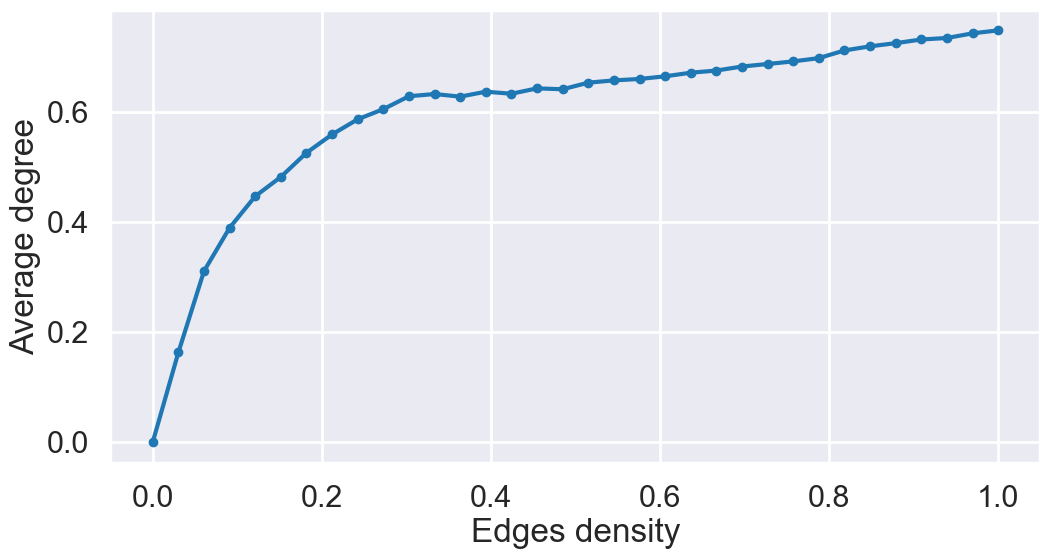

In [5]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_clustering = []
ds = np.arange(0,(n*n-n)//2,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_clustering_ = nx.average_clustering(G)
    avg_clustering.append(avg_clustering_)
    
plt.plot(ds/ds.max(),avg_clustering,'.-')
plt.xlabel('Edges density')
plt.ylabel('Average degree');

In [6]:
sort_corrs[300]

0.78922

In [7]:
aristas_posibles= (n*n-n)
aristas_posibles*0.15 #Busco cantidad tal que densidad sea 0.15

2001.0

In [8]:
aristas_posibles*0.025 

333.5

In [9]:
aristas_posibles

13340

### Sujeto 1: N1 vs W

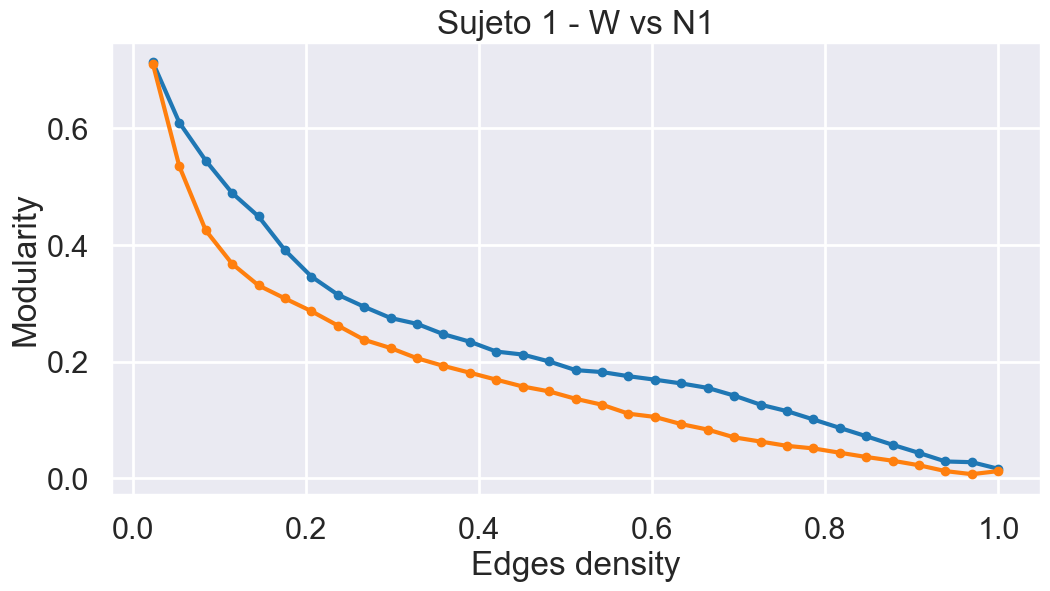

In [10]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(300,(n*n-n),400)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/ds.max(),modularity,'.-')
plt.plot(ds/ds.max(),modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 1: N1 vs W, cambio de escala

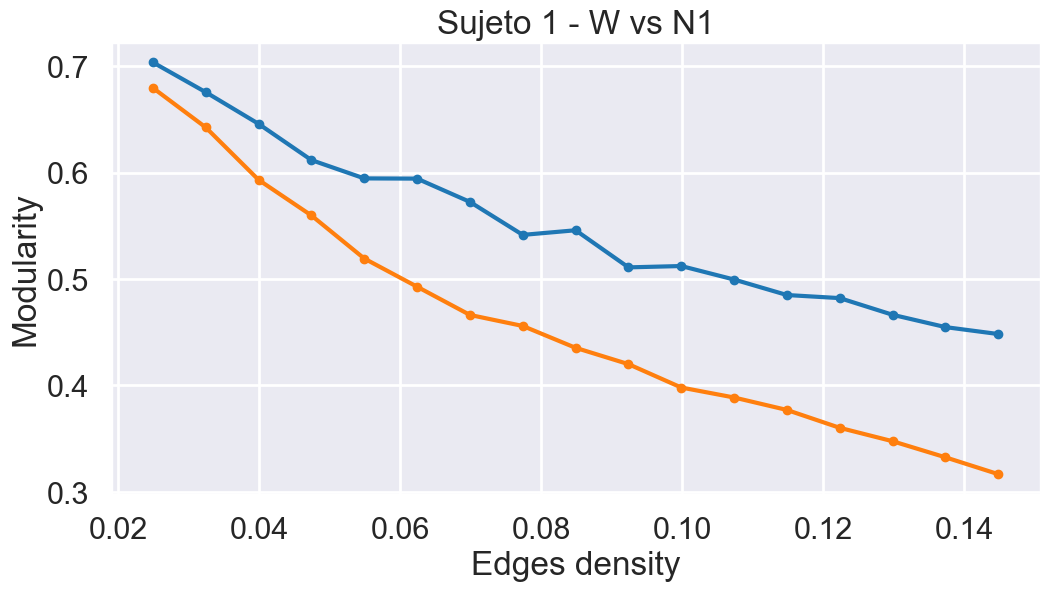

In [11]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(332,2002,100)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N1 vs W

In [12]:
filename = '../resources/DataSujetos/N1_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

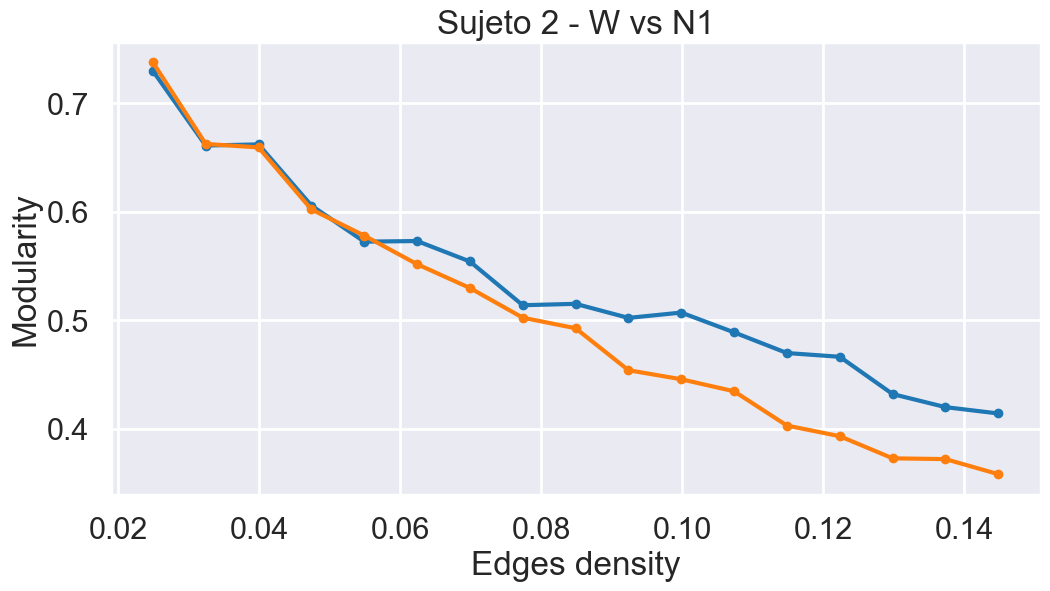

In [13]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(332,2002,100)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N3 vs W

In [14]:
filename = '../resources/DataSujetos/N3_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

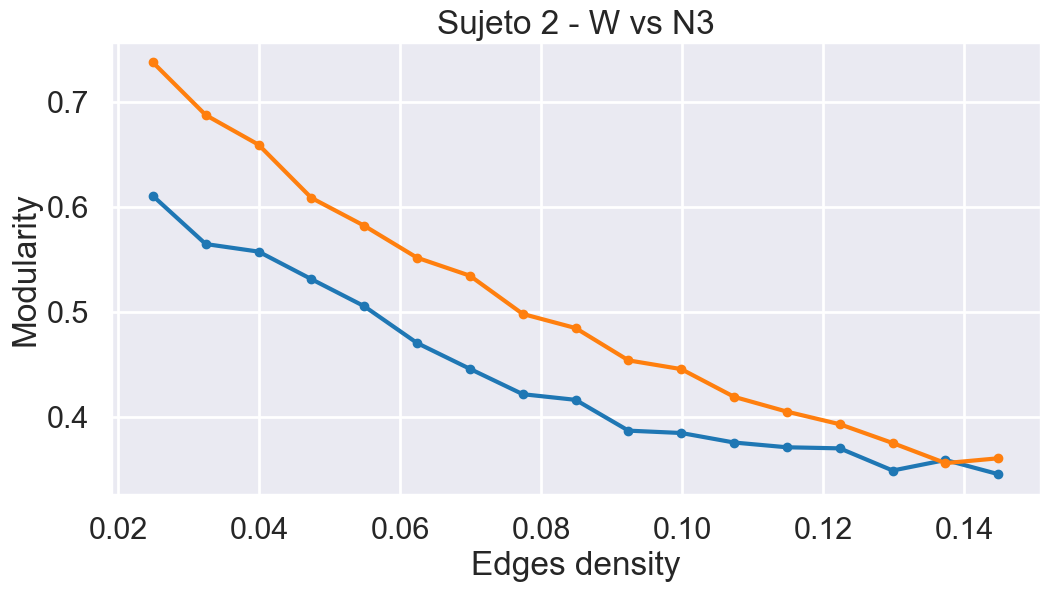

In [15]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(332,2002,100)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

Text(0, 0.5, 'Number of modules')

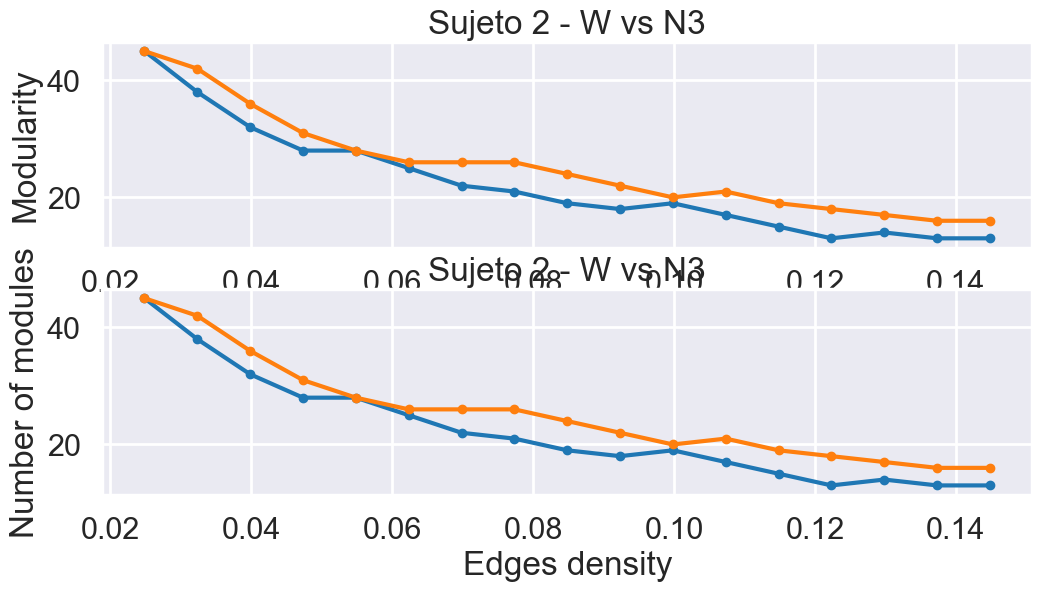

In [16]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(332,2002,100)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


Text(0, 0.5, 'Number of modules')

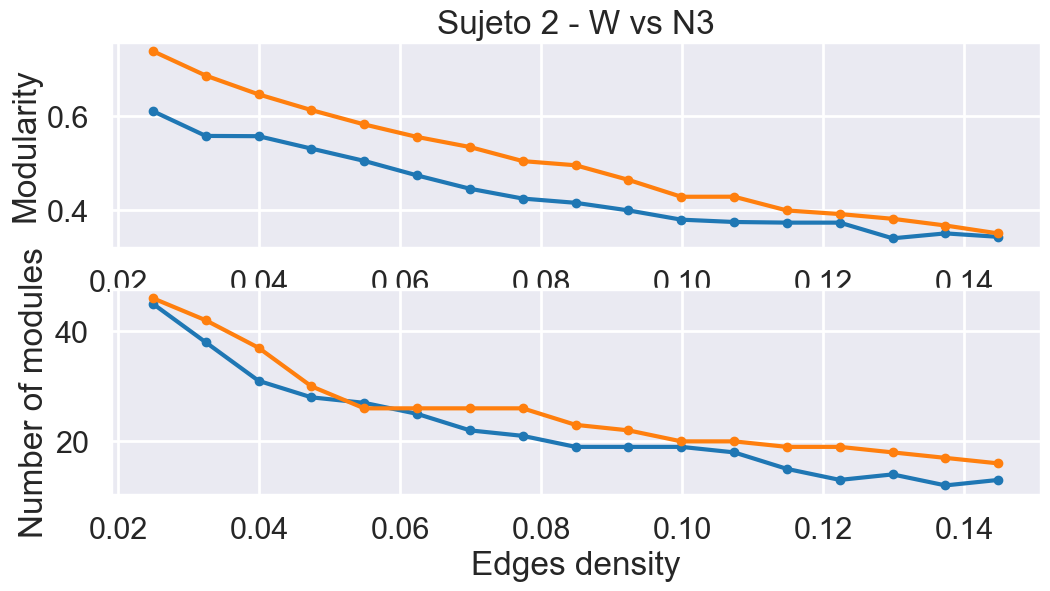

In [17]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(332,2002,100)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Cálculo de coeficiente de modularidad y Número de módulos para cada sujeto, en función a distintas densidades

### Se definen las densidades de links a emplear

In [18]:
ds = np.arange(332,2002,100)

### Estadío W

In [19]:
for i in range(18):
    filename = '../resources/DataSujetos/W_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_W = pd.DataFrame(modularity)
        df_number_of_modules_W = pd.DataFrame(number_of_modules)
    
    df_modularity_W.loc[:,i] = modularity
    df_number_of_modules_W.loc[:,i] = number_of_modules
    
    df_modularity_W['mean']=df_modularity_W.mean(axis=1)
    df_number_of_modules_W['mean']=df_number_of_modules_W.mean(axis=1)
    df_modularity_W['sd']=df_modularity_W.drop('mean',axis=1).std(axis=1)/(18**(1/2))
    df_number_of_modules_W['sd']=df_number_of_modules_W.drop('mean',axis=1).std(axis=1)/(18**(1/2))


### Estadío N1

In [20]:
for i in range(18):
    filename = '../resources/DataSujetos/N1_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N1 = pd.DataFrame(modularity)
        df_number_of_modules_N1 = pd.DataFrame(number_of_modules)
    
    df_modularity_N1.loc[:,i] = modularity
    df_number_of_modules_N1.loc[:,i] = number_of_modules
    
    df_modularity_N1['mean']=df_modularity_N1.mean(axis=1)
    df_number_of_modules_N1['mean']=df_number_of_modules_N1.mean(axis=1)
    df_modularity_N1['sd']=df_modularity_N1.drop('mean',axis=1).std(axis=1)/(18**(1/2))
    df_number_of_modules_N1['sd']=df_number_of_modules_N1.drop('mean',axis=1).std(axis=1)/(18**(1/2))

  

#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [44]:
ttest_modularity_W_N1 = pd.DataFrame(stats.ttest_rel(df_modularity_W.loc[:,l1], df_modularity_N1.loc[:,l1], axis=1)[1])
ttest_modularity_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N1 = ttest_modularity_W_N1.loc[ttest_modularity_W_N1[0]<=0.05,:]
df_ttest_modularity_W_N1

,0,1


In [26]:
ttest_number_of_modules_W_N1 = pd.DataFrame(stats.ttest_rel(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N1.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N1 = ttest_number_of_modules_W_N1.loc[ttest_number_of_modules_W_N1[0]<=0.05,:]
df_ttest_number_of_modules_W_N1

,0,1


Text(0, 0.5, 'Number of modules')

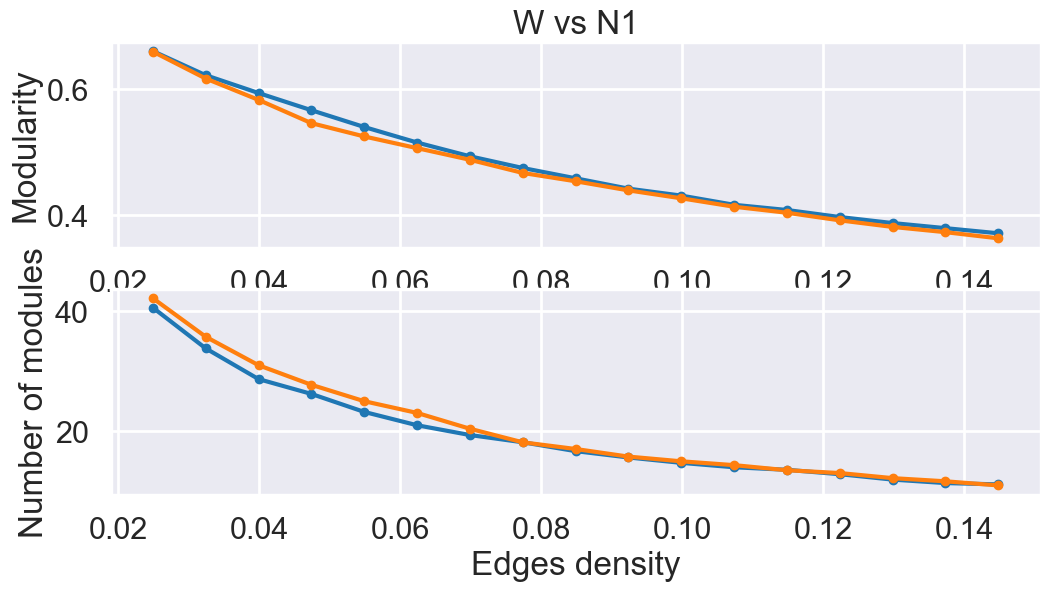

In [27]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-')
plt.plot(df_ttest_modularity_W_N1[1],df_ttest_modularity_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N1')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N1[1],df_ttest_number_of_modules_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N2

In [28]:
for i in range(18):
    filename = '../resources/DataSujetos/N2_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N2 = pd.DataFrame(modularity)
        df_number_of_modules_N2 = pd.DataFrame(number_of_modules)
    
    df_modularity_N2.loc[:,i] = modularity
    df_number_of_modules_N2.loc[:,i] = number_of_modules
    
    df_modularity_N2['mean']=df_modularity_N2.mean(axis=1)
    df_number_of_modules_N2['mean']=df_number_of_modules_N2.mean(axis=1)
    df_modularity_N2['sd']=df_modularity_N2.drop('mean',axis=1).std(axis=1)/(18**(1/2))
    df_number_of_modules_N2['sd']=df_number_of_modules_N2.drop('mean',axis=1).std(axis=1)/(18**(1/2))

  

#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [29]:
ttest_modularity_W_N2 = pd.DataFrame(stats.ttest_rel(df_modularity_W.loc[:,l1], df_modularity_N2.loc[:,l1], axis=1)[1])
ttest_modularity_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N2 = ttest_modularity_W_N2.loc[ttest_modularity_W_N2[0]<=0.05,:]
df_ttest_modularity_W_N2

,0,1
0,0.016061,0.024888
1,0.025634,0.032384


In [30]:
ttest_number_of_modules_W_N2 = pd.DataFrame(stats.ttest_rel(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N2.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N2 = ttest_number_of_modules_W_N2.loc[ttest_number_of_modules_W_N2[0]<=0.05,:]
df_ttest_number_of_modules_W_N2

,0,1
8,0.043736,0.084858
11,0.046241,0.107346
12,0.030502,0.114843
13,0.043420,0.122339
14,0.032644,0.129835
15,0.042209,0.137331
16,0.024608,0.144828


Text(0, 0.5, 'Number of modules')

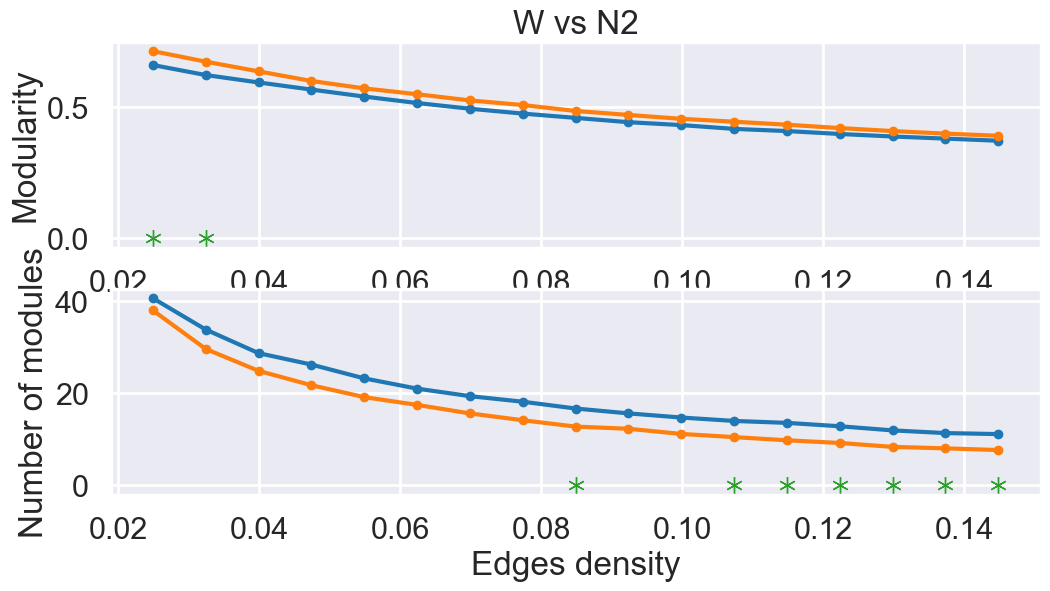

In [31]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-')
plt.plot(df_ttest_modularity_W_N2[1],df_ttest_modularity_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N2')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N2[1],df_ttest_number_of_modules_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N3

In [32]:
for i in range(18):
    filename = '../resources/DataSujetos/N3_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N3 = pd.DataFrame(modularity)
        df_number_of_modules_N3 = pd.DataFrame(number_of_modules)
    
    df_modularity_N3.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N3.loc[:,i] = number_of_modules
    
    df_modularity_N3['mean']=df_modularity_N3.mean(axis=1)
    df_number_of_modules_N3['mean']=df_number_of_modules_N3.mean(axis=1)
    df_modularity_N3['sd']=df_modularity_N3.drop('mean',axis=1).std(axis=1)/(18**(1/2))
    df_number_of_modules_N3['sd']=df_number_of_modules_N3.drop('mean',axis=1).std(axis=1)/(18**(1/2))


In [33]:
df_modularity_W.loc[0,l1]

0     0.671483
1     0.737459
2     0.687009
3     0.690505
4     0.735487
5     0.647065
6     0.728600
7     0.586665
8     0.690272
9     0.741726
10    0.710603
11    0.706013
12    0.791979
13    0.779322
14    0.467855
15    0.680573
16    0.707214
17    0.741923
Name: 0, dtype: float64

In [34]:
df_p_value_N = pd.DataFrame(df_modularity_W.loc[0,l1])
df_p_value_N['clase'] = "W"
df_p_value_N_ = pd.DataFrame(df_modularity_W.loc[0,l1])
df_p_value_N_['clase'] = "N2"
#df_p_value['0_N2'] = pd.DataFrame(df_modularity_N1.loc[:,l1][0])
df_p_value_N = df_p_value_N.append(df_p_value_N_)
df_p_value_N

,0,clase
0,0.671483,W
1,0.737459,W
2,0.687009,W
3,0.690505,W
4,0.735487,W
5,0.647065,W
6,0.728600,W
7,0.586665,W
8,0.690272,W
9,0.741726,W


#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [35]:
ttest_modularity_W_N3 =  pd.DataFrame(stats.ttest_rel(df_modularity_W.loc[:,l1], df_modularity_N3.loc[:,l1], axis=1)[1])
ttest_modularity_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N3 = ttest_modularity_W_N3.loc[ttest_modularity_W_N3[0]<=0.05,:]
df_ttest_modularity_W_N3

,0,1


In [36]:
ttest_number_of_modules_W_N3 =  pd.DataFrame(stats.ttest_rel(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N3.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N3 = ttest_number_of_modules_W_N3.loc[ttest_number_of_modules_W_N3[0]<=0.05,:]
df_ttest_number_of_modules_W_N3

,0,1
1,0.044632,0.032384
2,0.035586,0.039880
3,0.027458,0.047376
4,0.049486,0.054873
12,0.042921,0.114843


Text(0, 0.5, 'Number of modules')

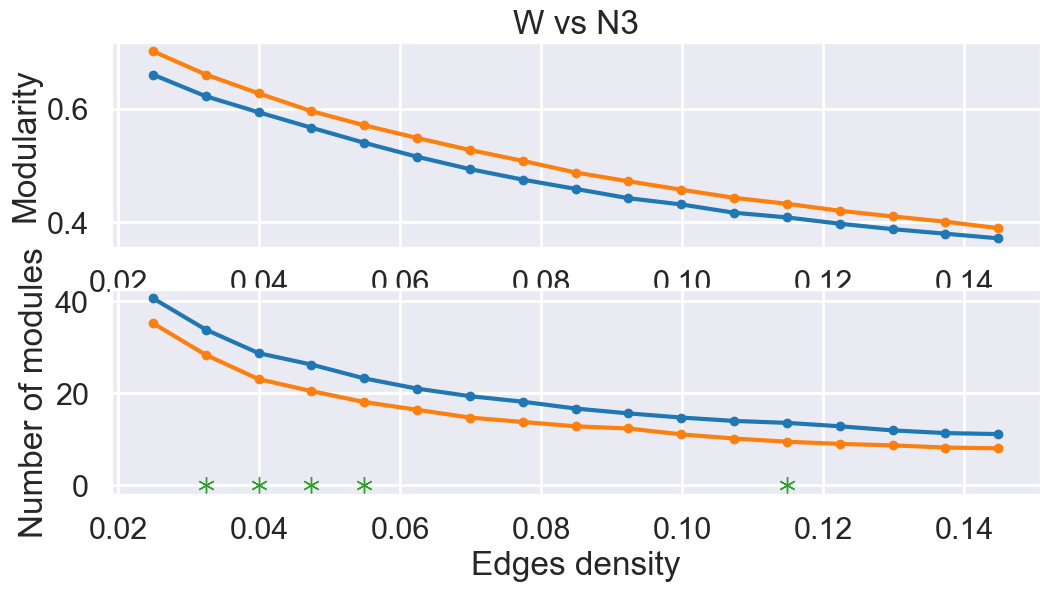

In [37]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-')
plt.plot(df_ttest_modularity_W_N3[1],df_ttest_modularity_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N3[1],df_ttest_number_of_modules_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Ploteo todo junto

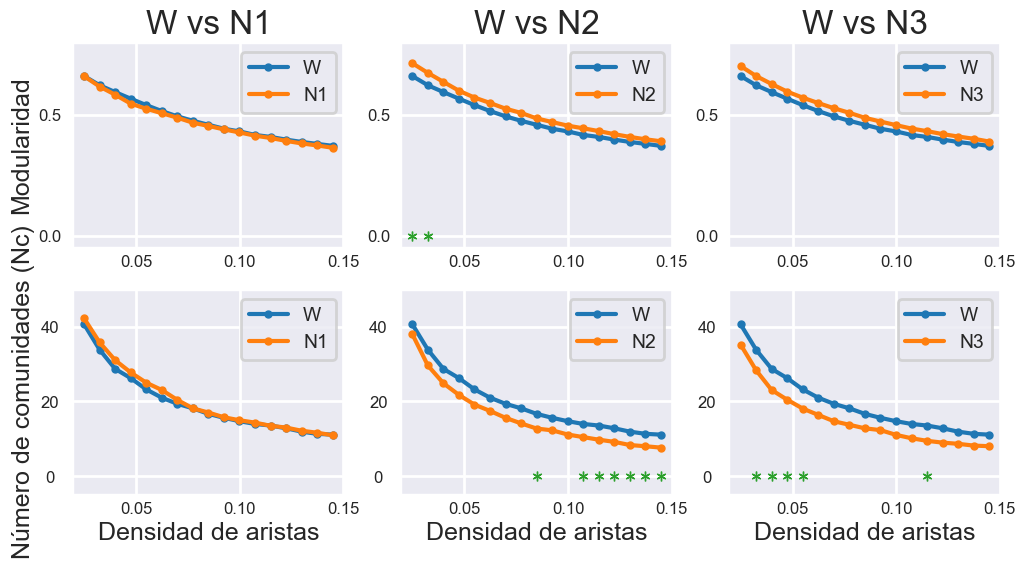

In [38]:
plt.subplot(231)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-',label='N1',markersize=10)
plt.plot(df_ttest_modularity_W_N1[1],df_ttest_modularity_W_N1[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N1')
plt.ylabel('Modularidad', size = 18)
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(234)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-',label='N1',markersize=10)
plt.plot(df_ttest_number_of_modules_W_N1[1],df_ttest_number_of_modules_W_N1[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylabel('Número de comunidades (Nc)', size =18)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(232)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-',label='N2',markersize=10)
plt.plot(df_ttest_modularity_W_N2[1],df_ttest_modularity_W_N2[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N2')
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(235)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-',label='N2',markersize=10)
plt.plot(df_ttest_number_of_modules_W_N2[1],df_ttest_number_of_modules_W_N2[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(233)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-',label='N3',markersize=10)
plt.plot(df_ttest_modularity_W_N3[1],df_ttest_modularity_W_N3[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N3')
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(236)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-',label='N3',markersize=10)
plt.plot(df_ttest_number_of_modules_W_N3[1],df_ttest_number_of_modules_W_N3[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')



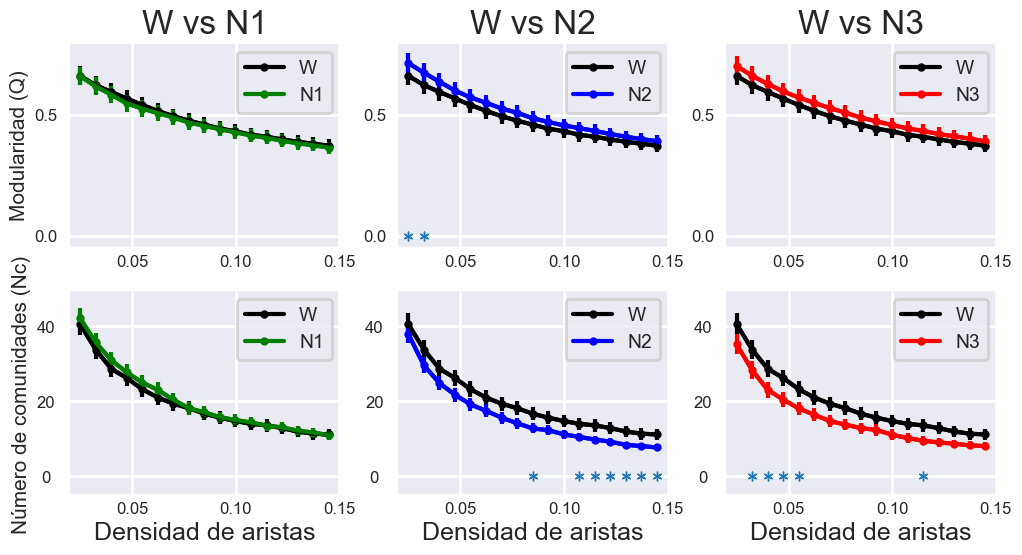

In [40]:
plt.subplot(231)  

plt.errorbar(ds/aristas_posibles,list(df_modularity_W['mean']),list(df_modularity_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_modularity_N1['mean']),list(df_modularity_N1['sd']),color='green')
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-',label='N1',markersize=10,color='green')
plt.plot(df_ttest_modularity_W_N1[1],df_ttest_modularity_W_N1[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N1')
plt.ylabel('Modularidad (Q)', size = 15)
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(234)

plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_W['mean']),list(df_number_of_modules_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),list(df_number_of_modules_N1['sd']),color='green')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-',label='N1',markersize=10,color='green')
plt.plot(df_ttest_number_of_modules_W_N1[1],df_ttest_number_of_modules_W_N1[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylabel('Número de comunidades (Nc) ', size =15)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(232)   
plt.errorbar(ds/aristas_posibles,list(df_modularity_W['mean']),list(df_modularity_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_modularity_N2['mean']),list(df_modularity_N2['sd']),color='blue')
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-',label='N2',markersize=10,color='blue')
plt.plot(df_ttest_modularity_W_N2[1],df_ttest_modularity_W_N2[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N2')
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(235)

plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_W['mean']),list(df_number_of_modules_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),list(df_number_of_modules_N2['sd']),color='blue')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-',label='N2',markersize=10,color='blue')
plt.plot(df_ttest_number_of_modules_W_N2[1],df_ttest_number_of_modules_W_N2[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(233)

plt.errorbar(ds/aristas_posibles,list(df_modularity_W['mean']),list(df_modularity_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_modularity_N3['mean']),list(df_modularity_N3['sd']),color='red')
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-',label='N3',markersize=10,color='red')
plt.plot(df_ttest_modularity_W_N3[1],df_ttest_modularity_W_N3[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.title('W vs N3')
plt.ylim(-0.05,0.8)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.subplot(236)

plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_W['mean']),list(df_number_of_modules_W['sd']),color='black')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-',label='W',markersize=10,color='black')
plt.errorbar(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),list(df_number_of_modules_N3['sd']),color='red')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-',label='N3',markersize=10,color='red')
plt.plot(df_ttest_number_of_modules_W_N3[1],df_ttest_number_of_modules_W_N3[0]*0, linestyle='',marker=(6, 2, 0),markersize=7)
plt.xlabel('Densidad de aristas', size = 18)
plt.ylim(-5,50)
plt.xticks(size=12, va = "bottom")
plt.yticks(size=12, ha = "center")
plt.legend(fontsize='xx-small')

plt.savefig('3_integrado.png')



### Test de hipotesis de normalidad de Shapiro para la diferencia 

In [65]:
normality_test=[]
for i in np.arange(17):
    normality_test.append(stats.shapiro((df_modularity_W.loc[:,l1]-df_modularity_N1.loc[:,l1]).loc[i,:])[1])
normality_test

[0.818687379360199,
 0.8507789969444275,
 0.8464222550392151,
 0.7749837040901184,
 0.9934637546539307,
 0.8499163389205933,
 0.406076580286026,
 0.5496646165847778,
 0.1973617821931839,
 0.431523859500885,
 0.42037829756736755,
 0.3610542118549347,
 0.28670766949653625,
 0.24510033428668976,
 0.5092769265174866,
 0.6456766128540039,
 0.5215753316879272]

In [66]:
normality_test=[]
for i in np.arange(17):
    normality_test.append(stats.shapiro((df_modularity_W.loc[:,l1]-df_modularity_N2.loc[:,l1]).loc[i,:])[1])
normality_test

[0.42129218578338623,
 0.6399765014648438,
 0.9333547949790955,
 0.7901167869567871,
 0.7054661512374878,
 0.7428784370422363,
 0.7085825204849243,
 0.6399018168449402,
 0.6116039752960205,
 0.7965613603591919,
 0.8818484544754028,
 0.7738817930221558,
 0.8465548157691956,
 0.775457501411438,
 0.8600423336029053,
 0.7349415421485901,
 0.8152568936347961]

In [67]:
normality_test=[]
for i in np.arange(17):
    normality_test.append(stats.shapiro((df_modularity_W.loc[:,l1]-df_modularity_N3.loc[:,l1]).loc[i,:])[1])
normality_test

[0.9127954244613647,
 0.7084176540374756,
 0.7000299096107483,
 0.641497790813446,
 0.5347429513931274,
 0.6926507949829102,
 0.28921201825141907,
 0.28351715207099915,
 0.3337448835372925,
 0.2312013804912567,
 0.21308599412441254,
 0.10114867240190506,
 0.18219666182994843,
 0.06705457717180252,
 0.04956045374274254,
 0.09105302393436432,
 0.08616695553064346]